In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

findfont: Font family ['KaiTi Regular'] not found. Falling back to DejaVu Sans.


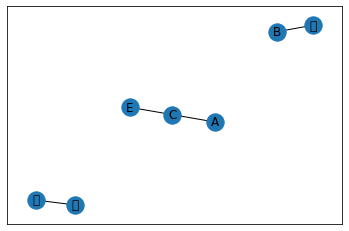

In [8]:
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['𘰺', 'B', 'C','A'], 'to':['𘱹', '𘰻', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw_networkx(G, with_labels=True, font_family = "KaiTi Regular")
plt.show()

In [2]:
def wordBreak(s, wordDict):
# Dynamic Programming (https://leetcode.com/problems/word-break/discuss/43808/Simple-DP-solution-in-Python-with-description)
# d is an array that contains booleans
# d[i] is True if there is a word in the dictionary that ends at ith index of s AND d is also True at the beginning of the word
    words = []
    n = len(s)
    dp = [False for i in range(n+1)]
    dp_idx = [-1 for i in range(n+1)]
    dp[0] = True
    for i in range(1,n+1):
        for w in wordDict:
            if dp[i-len(w)] and s[i-len(w):i] == w:
                dp[i] = True
                dp_idx[i] = i-len(w)
    i = len(dp_idx)-1
    while i > 0:
        words.append(s[dp_idx[i]:i])
        i = dp_idx[i]
    return dp[-1], reversed(words)

In [3]:
def root2edges(syllabaries, words):
    syl2vertex = {k: i for i, k in enumerate(syllabaries)}
    dic = {}
    edge_lists = set()
    for word in words:
        res = []
        can_break, broken_words = wordBreak(word, syllabaries)
        if can_break:
            res = [syl2vertex[x] for x in broken_words]
            dic[word] = res
            for i in range(len(res)):
                for j in range(i):
                    v1, v2 = res[i], res[j]
                    if (v1, v2) in edge_lists or (v2, v1) in edge_lists:
                        continue
                    else:
                        edge_lists.add((v1, v2))
        else:
            raise Exception('The root word can not be broken into syllabaries')
    return dic, list(edge_lists)

In [4]:
def create_graph(syllabaries, edge_list):
    g = Graph(directed=False)
    v_prop = g.new_vertex_property("string")
    for i in range(len(syllabaries)):
        v_prop[g.add_vertex()] = syllabaries[i]
    g.vertex_properties["name"] = v_prop 
    g.add_edge_list(edge_list)
    gt.stats.remove_parallel_edges(g)
    return g

In [9]:
def extract_two_largest_components(g):
    comp, hist= gt.topology.label_components(g, directed=False)
    graph_draw(g, vertex_fill_color=comp, vertex_text=g.vertex_properties["name"], vorder=comp)
    return 

In [1]:
%%html
<style>
body {
    font-family: "Comic Sans MS", cursive, sans-serif;
}
</style> 

In [2]:
def extract_words(text):
    with open(text) as f:
        wordsDict = []
        lines = f.readlines()
        for line in lines:
            words = line.split()
            print(words)

In [3]:
extract_words("langjun.txt")

['𘲇', '𘮝', '𘱚𘮒𘲦', '𘭅𘭂𘬐', '𘮉', '𘬞𘱞', '𘬓𘰫', '𘱚𘮰', '𘱄𘱹𘲚', '𘱖𘯺𘭗', '𘲽𘲑', '𘯴𘰷', '𘲅𘯺𘬐', '𘱆', '𘭕𘰕', '𘱄𘭏']
['𘬥𘯺𘬐', '𘲱𘱶𘱤', '𘲜𘮢𘲫', '𘰷𘰗𘱤', '𘰝𘰆𘲦', '𘲾𘭛', '𘱄𘮰𘰍', '𘱥𘱆𘲽', '𘱚𘬛𘱫', '𘰺𘱓𘭛', '𘱥𘮡𘰱', '𘮧𘭲𘱆𘱤', '𘱥𘰕', '𘲭']
['𘭞𘱄𘲲𘱦', '𘱄𘱤', '𘲽𘭕𘲦', '𘱘𘰴𘱦', '𘮽𘮘𘲲𘲐', '𘬥𘰍𘲚𘱞𘰴', '𘰛', '𘰷𘯜𘯹𘱄𘭂𘮅𘲫', '𘲫𘱮', '𘬝𘰹𘱆', '𘱥𘱆𘯥𘰷𘭢', '𘲫𘯌', '𘲝𘱸', '𘬥𘭛', '𘮧𘯶𘲀𘭢']
['𘱄𘰆𘯆𘲽', '𘯥𘱪𘲆𘱆', '𘰝𘱸𘱦', '𘱥𘱤𘰱', '𘬿𘲫', '𘱀𘲦', '𘱘𘰴', '𘮉𘮒', '𘱨𘮽𘲝𘲽', '𘱥𘱤𘬪𘲆𘱆', '𘮧𘬗𘱄𘲫𘯏', '𘮗', '𘰲', '𘰺𘬛𘱦', '𘰯', '𘲝']
['𘰷𘱹𘱓', '𘭅𘭂𘱦', '𘲐', '𘲌𘮒𘲫', '𘲚𘲀', '𘰯', '𘲂', '𘲺', '𘮧𘯶𘯎']
['𘬜𘲼', '𘱚𘱕', '𘰩𘬷𘱥𘱦', '𘲽𘱹', '𘮄𘱆', '𘱤𘰣', '𘭙', '𘱚𘱆', '𘬘𘰽𘲽𘱦', '𘲽𘱹', '𘮄𘱆', '𘭖𘱚', '𘲽𘰆', '𘬥𘮡', '𘭯', '𘱷', '𘱄𘰆', '𘲰𘱫', '𘭝']
['𘮰', '𘱥𘱤', '𘲽𘱦']


In [10]:
def main():
    # syllabaries & root words are a list of strings
    syllabaries = ["S"+str(i) for i in range(1, 51)]
    words = ["S3S11","S4S33", "S8S7","S25S2","S9S3S15", "S2S1S7","S5S6S10", "S21S6S4","S3S2" ,"S33S5", "S1S9"]
    root2vertex, edge_list = root2edges(syllabaries, words)
    print(root2vertex)
    print(edge_list)
    g = create_graph(syllabaries, edge_list)
    extract_two_largest_components(g)

{'S3S11': [2, 10], 'S4S33': [3, 32], 'S8S7': [7, 6], 'S25S2': [24, 1], 'S9S3S15': [8, 2, 14], 'S2S1S7': [1, 0, 6], 'S5S6S10': [4, 5, 9], 'S21S6S4': [20, 5, 3], 'S3S2': [2, 1], 'S33S5': [32, 4], 'S1S9': [0, 8]}
[(5, 4), (8, 0), (9, 5), (32, 3), (2, 8), (1, 24), (10, 2), (9, 4), (0, 1), (1, 2), (4, 32), (6, 1), (6, 7), (14, 2), (3, 5), (14, 8), (3, 20), (5, 20), (6, 0)]


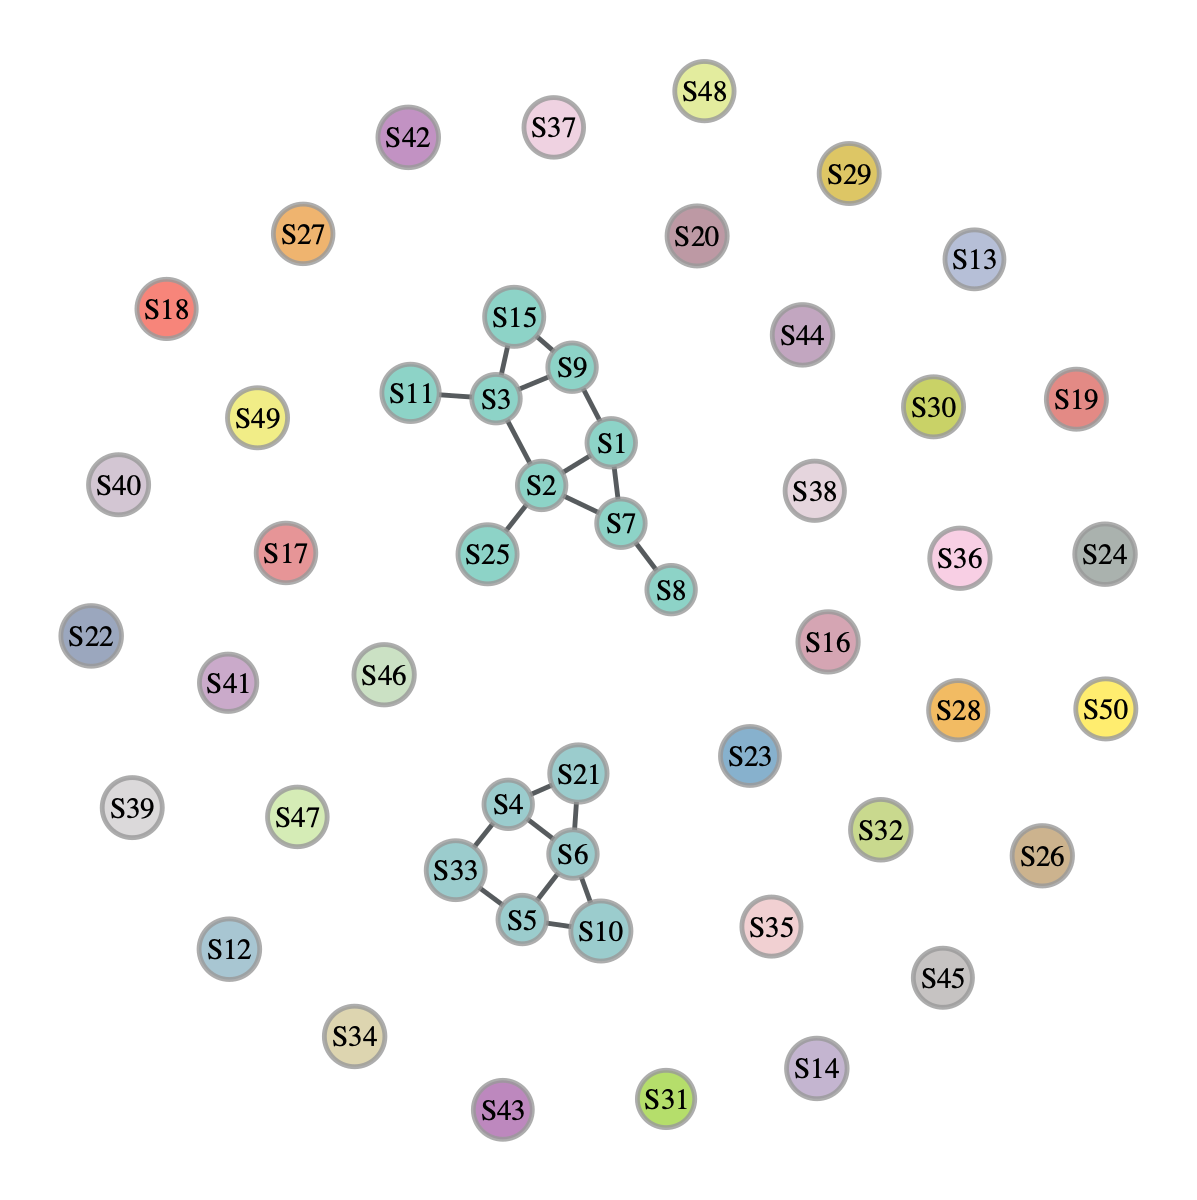

In [11]:
main()